# Logistic Regression

Adapted from Agarwal, Animesh.  ["Building a Logistic Regression in Python."](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)  Medium.  October 16, 2018.  

Dataset from Ng, Andrew. ["Machine Learning."](https://www.coursera.org/learn/machine-learning)  Coursera.    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc

In [2]:
data = pd.read_csv("data/marks.txt", header=None, names=['Exam1','Exam2','Acceptance'])

In [3]:
data

,Exam1,Exam2,Acceptance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

admitted = data.loc[y==1]
not_admitted = data.loc[y==0]

<Figure size 432x288 with 0 Axes>

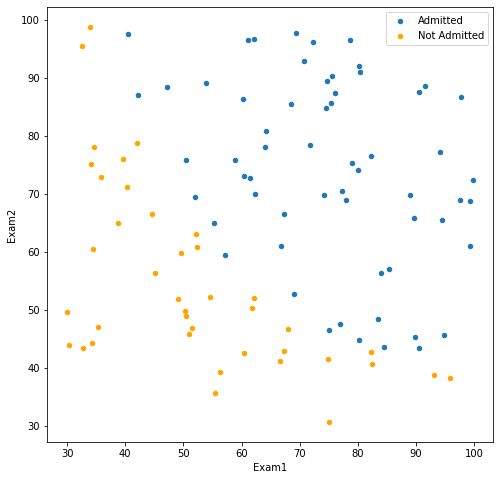

In [5]:
fig = plt.figure()
ax = admitted.plot.scatter(x="Exam1", y="Exam2", figsize=(8,8), label="Admitted")
not_admitted.plot.scatter(x="Exam1", y="Exam2", figsize=(8,8), c='orange', label="Not Admitted", ax=ax)
fig = ax.get_figure()

### Scikit-learn Implementation

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
model = LogisticRegression()
model.fit(X,y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y, predicted_classes)
print(f"Accuracy: {accuracy}")
parameters = model.coef_
print(f"Parameters: {parameters}")

Accuracy: 0.89
Parameters: [[0.20535491 0.2005838 ]]


### Scratch

In [8]:
# cost functions
def sigmoid(x):
    """Activation function to map real values between 0 and 1"""
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    """Compute weighted sum of inputs"""
    return np.dot(x, theta)

def probability(theta, x):
    """Probability after passing through sigmoid"""
    return sigmoid(net_input(theta, x))

def cost(theta, x, y):
    """Computes cost for all training samples"""
    m = x.shape[0]
    total_cost = -(1/m)*np.sum(y*np.log(probability(theta,x))+(1-y)*np.log(1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    """Computes gradient of cost function at point theta"""
    m = x.shape[0]
    return (1/m)* np.dot(x.T, sigmoid(net_input(theta, x))-y)

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x,y.flatten()))
    return opt_weights[0]

# metrics
def predict(x):
    theta = parameters[:,np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x)>= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [9]:
# prep data
X = np.c_[np.ones((X.shape[0],1)),X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1],1))

In [10]:
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [11]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [12]:
theta

array([[0.],
       [0.],
       [0.]])

In [13]:
parameters = fit(X, y, theta)
print(f"Parameters: {parameters}")

Parameters: [-25.16131865   0.20623159   0.20147149]


In [14]:
# plot decision boundary
x_values = [np.min(X[:,1]-5), np.max(X[:,2]+5)]
y_values = - (parameters[0] + np.dot(parameters[1],x_values)) / parameters[2]

<Figure size 432x288 with 0 Axes>

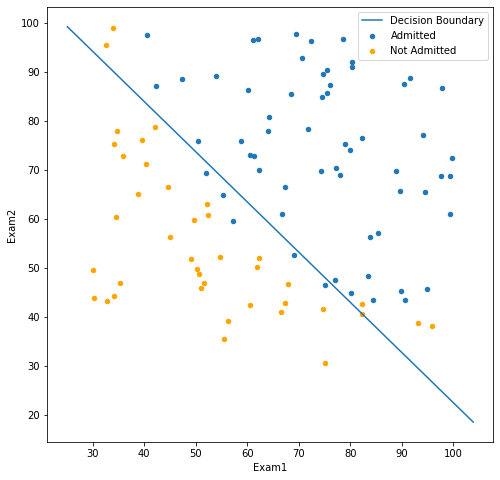

In [15]:
fig = plt.figure()
ax = admitted.plot.scatter(x="Exam1", y="Exam2", figsize=(8,8), label="Admitted")
not_admitted.plot.scatter(x="Exam1", y="Exam2", figsize=(8,8), c='orange', label="Not Admitted", ax=ax)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()
fig = ax.get_figure()

In [16]:
accuracy(X, y.flatten())

89.0